##1. Load Dataset

In [2]:
# 1. Load Data Set
import pandas as pd

file_path = 'loan_approval_dataset.csv'
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully.")
print("Shape:", df.shape)
df.head()

Dataset Loaded Successfully.
Shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


##2. Handling Missing Values

In [3]:
# 2. Handling Missing Values
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


##3. Encode Categorical Features

In [4]:
# 3. Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

df.columns = df.columns.str.strip()
print("Cleaned Columns:\n", df.columns.tolist())
label_cols = ['education', 'self_employed', 'loan_status']
le = LabelEncoder()
for col in label_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, drop_first=True)
print("Encoded data preview:")
df.head()

Cleaned Columns:
 ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
Encoded data preview:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


##4. Train-Test Split

In [5]:
# 4. Train-Test Split
from sklearn.model_selection import train_test_split

df.columns = df.columns.str.strip()
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("Target Distribution:\n", y.value_counts())

Training Set Shape: (3415, 12)
Testing Set Shape: (854, 12)
Target Distribution:
 loan_status
0    2656
1    1613
Name: count, dtype: int64


##5. Train A Classification Model

In [6]:
# 5. Train a Classification Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


##6. Evaluate Model On Imbalanced data

In [7]:
# 6. Evaluate Model on Imbalanced Data
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
 [[485  46]
 [116 207]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8070    0.9134    0.8569       531
           1     0.8182    0.6409    0.7188       323

    accuracy                         0.8103       854
   macro avg     0.8126    0.7771    0.7878       854
weighted avg     0.8112    0.8103    0.8046       854



##Bonus 1: Handle Imbalance Using SMOTE

In [8]:
# Bonus 1: Handle Imbalance Using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:\n", y_train_sm.value_counts())

Class distribution after SMOTE:
 loan_status
1    2125
0    2125
Name: count, dtype: int64


##Bonus 2: Train & Compare Logistic Regression vs Decision Tree

In [9]:
#Bonus 2: Train & Compare Logistic Regression vs Decision Tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_sm, y_train_sm)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)
print("\n--- Logistic Regression ---")
print(classification_report(y_test, lr.predict(X_test), digits=4))
print("\n--- Decision Tree ---")
print(classification_report(y_test, dt.predict(X_test), digits=4))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0     0.8416    0.8606    0.8510       531
           1     0.7621    0.7337    0.7476       323

    accuracy                         0.8126       854
   macro avg     0.8018    0.7972    0.7993       854
weighted avg     0.8115    0.8126    0.8119       854


--- Decision Tree ---
              precision    recall  f1-score   support

           0     0.9831    0.9849    0.9840       531
           1     0.9752    0.9721    0.9736       323

    accuracy                         0.9801       854
   macro avg     0.9791    0.9785    0.9788       854
weighted avg     0.9801    0.9801    0.9801       854



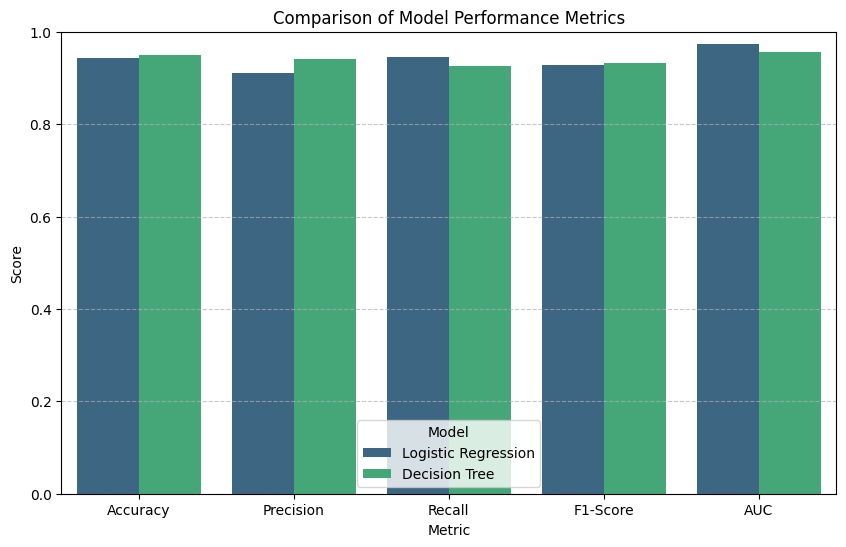

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract the evaluation metrics from the previous output (replace with actual values if needed)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
log_reg_scores = [0.9437939110070258, 0.9104477611940298, 0.9442724458204335, 0.9270516717325228, 0.9737949893011026]
dt_scores = [0.949648711943794, 0.940251572327044, 0.9256965944272446, 0.9329173166926678, 0.9551141895949578]

# Create a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': log_reg_scores,
    'Decision Tree': dt_scores
})

# Reshape the DataFrame for plotting
comparison_df_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Create a bar plot to compare the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) # Set y-axis limit for scores between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Bonus 1: Random Oversampling

In [13]:
#Bonus 1: Random Oversampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

rf_ros = RandomForestClassifier(random_state=42)
rf_ros.fit(X_resampled_ros, y_resampled_ros)
y_pred_ros = rf_ros.predict(X_test)
print("🎯 Random Oversampling Results")
print("Accuracy:", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))

🎯 Random Oversampling Results
Accuracy: 0.9812646370023419
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

